# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [1]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [5]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


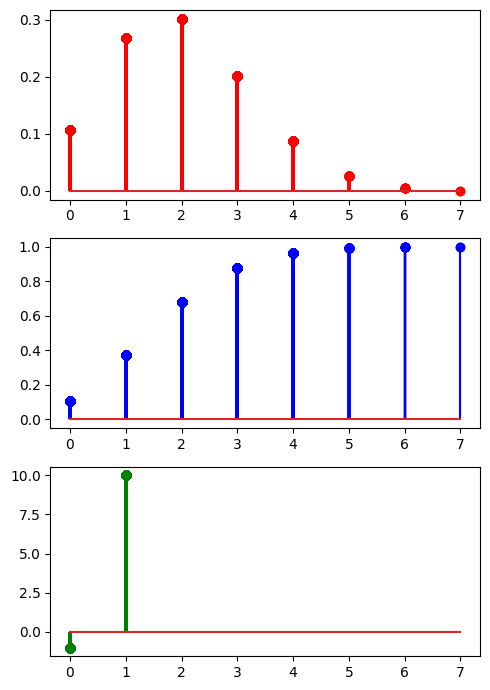

In [6]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Estimación puntual de la distribución normal

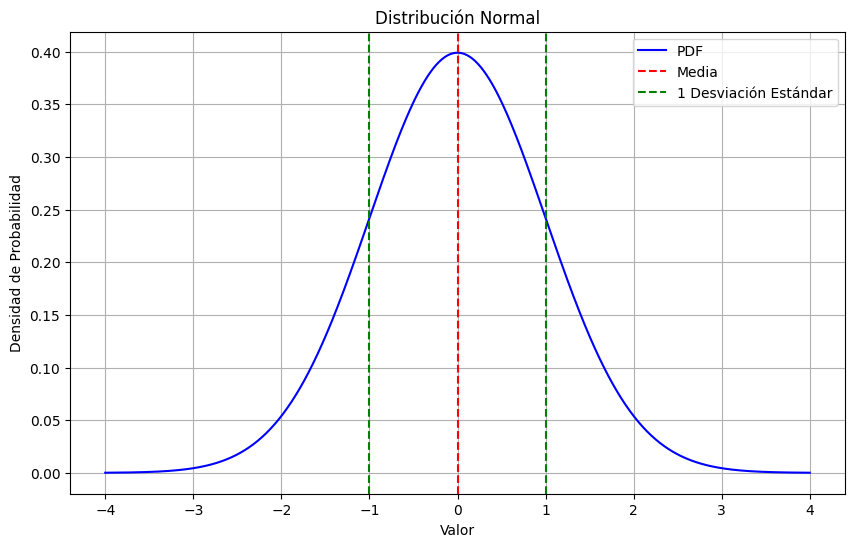

In [18]:
from scipy.stats import norm

def dnorm(x, mean=0, std_dev=1):

    result = norm.pdf(x, loc=mean, scale=std_dev)

    return result

mean = 0     
std_dev = 1   

x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = norm.pdf(x, loc=mean, scale=std_dev)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='PDF', color='blue')
plt.title('Distribución Normal')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.axvline(mean, color='red', linestyle='--', label='Media')
plt.axvline(mean + std_dev, color='green', linestyle='--', label='1 Desviación Estándar')
plt.axvline(mean - std_dev, color='green', linestyle='--')
plt.legend()
plt.grid()
plt.show()




Calcula el acumulado de la distribución normal

Probabilidad acumulada hasta q = 1.0 : 0.8413447460685429


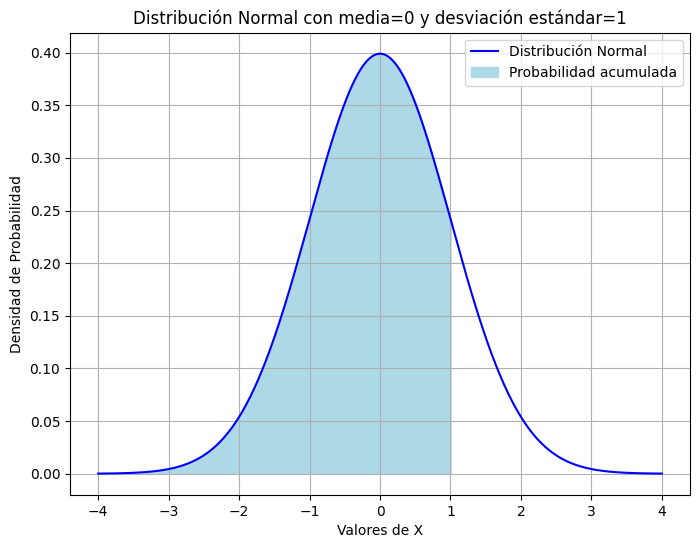

In [35]:
def pnorm(q, mean=0, std_dev=1):

    result = norm.cdf(q, loc=mean, scale=std_dev)
    return result

q = 1.0

print("Probabilidad acumulada hasta q =", q, ":", pnorm(q, mean, std_dev))

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, mean, std_dev)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Distribución Normal', color='blue')

x_fill = np.linspace(-4, q, 1000)
y_fill = norm.pdf(x_fill, mean, std_dev)

plt.fill_between(x_fill, y_fill, color='lightblue', label='Probabilidad acumulada')
plt.title(f'Distribución Normal con media={mean} y desviación estándar={std_dev}')
plt.xlabel('Valores de X')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()




Calcula la función cuantil a partir de la distribución normal????

Percentil para p = 0.95 : 1.6448536269514722


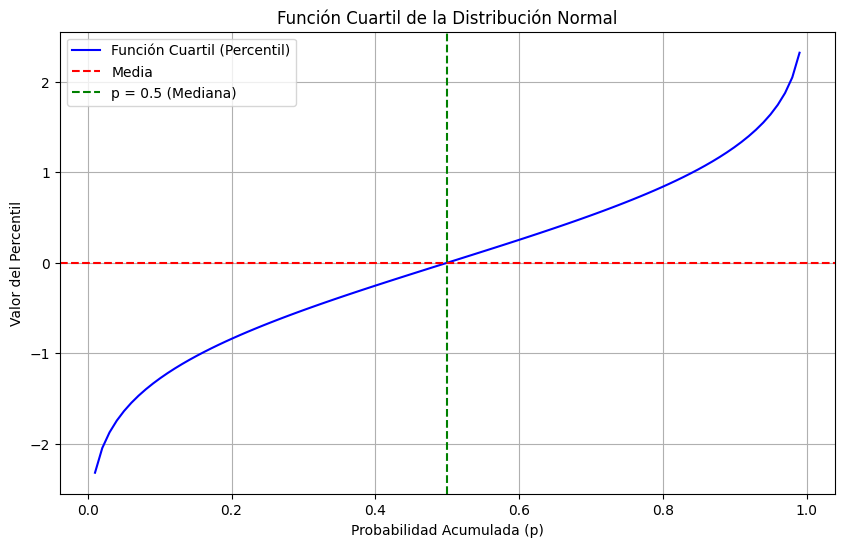

In [34]:
from scipy.stats import norm

def qnorm(p, mean=0, std_dev=1):
    
    result = norm.ppf(p, loc=mean, scale=std_dev)
    return result

p = 0.95

print("Percentil para p =", p, ":", qnorm(p, mean, std_dev))

p = np.linspace(0, 1, 100)

percentiles = norm.ppf(p, loc=mean, scale=std_dev)

plt.figure(figsize=(10, 6))
plt.plot(p, percentiles, label='Función Cuartil (Percentil)', color='blue')
plt.title('Función Cuartil de la Distribución Normal')
plt.xlabel('Probabilidad Acumulada (p)')
plt.ylabel('Valor del Percentil')
plt.axhline(0, color='red', linestyle='--', label='Media')
plt.axvline(0.5, color='green', linestyle='--', label='p = 0.5 (Mediana)')
plt.legend()
plt.grid()
plt.show()



Genera variables aleatorias a partir de la distribución normal???

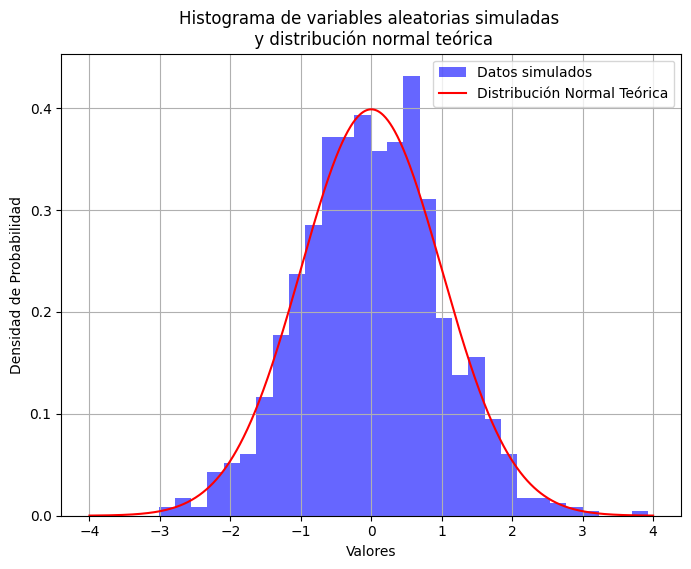

In [33]:
def rnorm(n, mean=0, std_dev=1):
    
    result = norm.rvs(loc=mean, scale=std_dev, size=n)
    return result

variables_aleatorias = norm.rvs(loc=0, scale=1, size=1000)

plt.figure(figsize=(8, 6))
plt.hist(variables_aleatorias, bins=30, density=True, alpha=0.6, color='blue', label='Datos simulados')

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, loc=0, scale=1)
plt.plot(x, y, 'r-', label='Distribución Normal Teórica')
plt.title('Histograma de variables aleatorias simuladas \n y distribución normal teórica')
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
np.random.seed(42)

print(f"Density at x=2 for a Normal({mean}, {std_dev}): {norm.pdf(2, loc=mean, scale=std_dev)}")
print(f"Probability that a Normal({mean}, {std_dev}) takes a value less than 2: {norm.cdf(2, loc=mean, scale=std_dev)}")
print(f"Which value of a Normal({mean}, {std_dev}) has a cumulative probability of 0.9? {norm.ppf(0.9, loc=mean, scale=std_dev)}")
random_values = norm.rvs(loc=mean, scale=std_dev, size=2000)
print(f"Generate 2000 random values from a Normal({mean}, {std_dev}) distribution: {random_values[:10]}")


Density at x=2 for a Normal(0, 1): 0.05399096651318806
Probability that a Normal(0, 1) takes a value less than 2: 0.9772498680518208
Which value of a Normal(0, 1) has a cumulative probability of 0.9? 1.2815515655446004
Generate 2000 random values from a Normal(0, 1) distribution: [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004]


Calcula la estimación puntual de la distribución uniforme.???

In [36]:
from scipy.stats import uniform

def dunif(x, a=0, b=1):
    
    result = uniform.pdf(x, loc=a, scale=b-a)
    return result



In [ ]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result